# Import Libraries

In [27]:
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparation

Dataset diambil menggunakan API Visual Crossing. Data tersebar dalam beberapa CSV sehingga perlu digabung menjadi 1 buah dataset terlebih dahulu.

In [28]:
letak_file = 'Kecamatan/'

In [29]:
jonggol1 = pd.read_csv(letak_file + 'Jonggol 23 September 2012 24 Februari 2015.csv')
jonggol2 = pd.read_csv(letak_file + 'Jonggol 25 Feb 2015 27 Juli 2017.csv')
jonggol3 = pd.read_csv(letak_file + 'Jonggol 28 Juli 2017 28 Desember 2019.csv')
jonggol4 = pd.read_csv(letak_file + 'Jonggol 29 Desember 2019 23 September 2022.csv')

In [30]:
df = pd.concat([jonggol1, jonggol2, jonggol3, jonggol4], axis = 0)

In [31]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"-6.495660182,107.0462951",2012-09-23,32.8,23.0,28.1,37.0,23.0,30.6,22.6,73.1,...,25.9,10,NaN,2012-09-23T05:40:44,2012-09-23T17:47:39,0.28,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
1,"-6.495660182,107.0462951",2012-09-24,32.2,23.4,27.9,37.9,23.4,30.5,22.8,74.5,...,23.7,9,NaN,2012-09-24T05:40:13,2012-09-24T17:47:29,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
2,"-6.495660182,107.0462951",2012-09-25,32.8,22.6,27.7,38.0,22.6,30.1,21.9,71.0,...,21.7,9,NaN,2012-09-25T05:39:41,2012-09-25T17:47:19,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
3,"-6.495660182,107.0462951",2012-09-26,32.0,22.5,27.4,37.9,22.5,29.6,22.0,72.6,...,19.9,9,NaN,2012-09-26T05:39:10,2012-09-26T17:47:09,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
4,"-6.495660182,107.0462951",2012-09-27,33.3,22.3,27.3,36.8,22.3,29.0,21.5,71.7,...,21.8,9,NaN,2012-09-27T05:38:39,2012-09-27T17:46:59,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"-6.49566018240588, 107.04629514365",2022-09-19,33.0,22.4,27.0,38.1,22.4,28.9,22.7,78.6,...,20.7,10,30.0,2022-09-19T05:43:08,2022-09-19T17:48:29,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
996,"-6.49566018240588, 107.04629514365",2022-09-20,32.5,21.7,27.9,36.8,21.7,30.4,22.4,73.2,...,22.1,10,30.0,2022-09-20T05:42:36,2022-09-20T17:48:18,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
997,"-6.49566018240588, 107.04629514365",2022-09-21,31.7,24.0,27.9,36.6,24.0,30.6,23.4,77.8,...,20.9,9,30.0,2022-09-21T05:42:04,2022-09-21T17:48:08,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH,remote"
998,"-6.49566018240588, 107.04629514365",2022-09-22,31.2,25.0,27.5,37.7,25.0,30.0,24.2,83.0,...,20.2,8,30.0,2022-09-22T05:41:32,2022-09-22T17:47:57,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH"


Penelitian bertujuan untuk meramalkan temperatur kedepannya, sehingga variabel yang diambil hanya variabel datetime dan temp.

In [32]:
df = df[['datetime', 'temp']]

In [33]:
df.head()

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3


Variabel datetime akan diubah menjadi bertipe datetime (sebelumnya string) dan dibuat menjadi indeks dari dataset.

In [34]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [35]:
df

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3
...,...,...
995,2022-09-19,27.0
996,2022-09-20,27.9
997,2022-09-21,27.9
998,2022-09-22,27.5


In [36]:
df.set_index(['datetime'],inplace=True)

In [37]:
df.head()

,temp
datetime,
2012-09-23,28.1
2012-09-24,27.9
2012-09-25,27.7
2012-09-26,27.4
2012-09-27,27.3


Berikut adalah plot temperatur Kecamatan Jonggol, Kabupaten Bogor selama 10 tahun terakhir.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

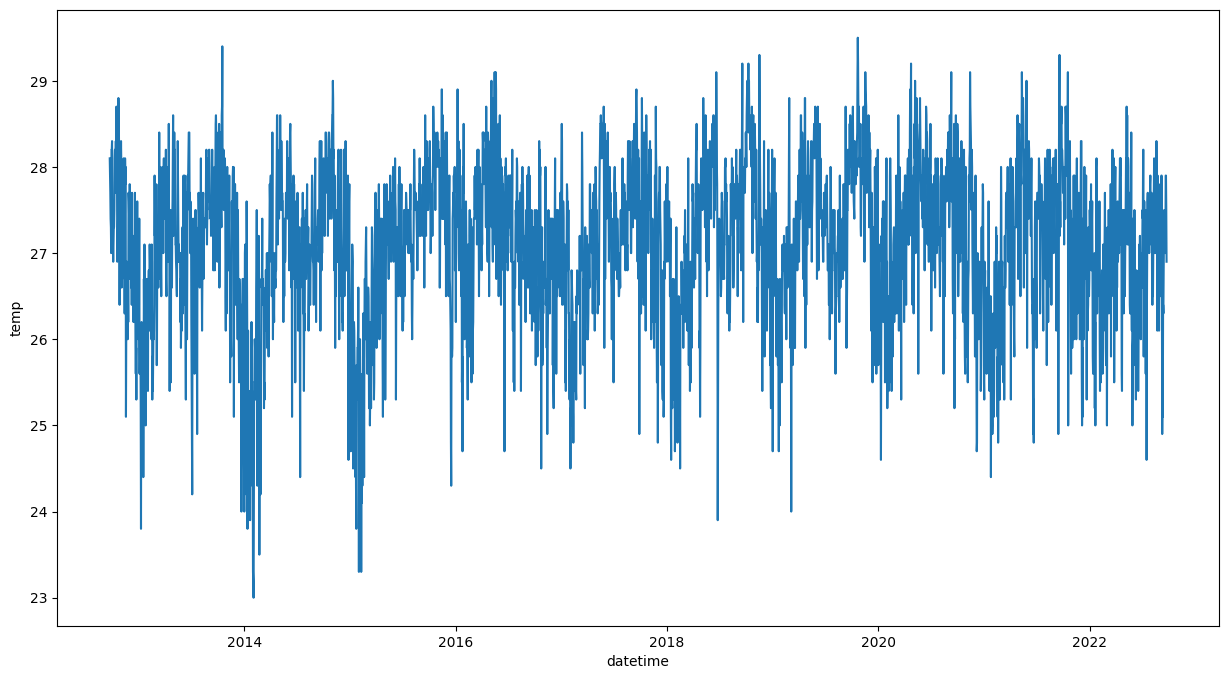

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

# Data Preprocessing

Dataset dipisahkan menjadi data latih dan data uji, dengan proporsi 80% data latih dan 20% data uji. Data latih kemudian dipisahkan kembali menjadi data latih dan data validasi, sehingga proporsi keseluruhan data latih, data validasi dan data uji adlaah 40% : 40% : 20%.

In [39]:
X_train = df[:1461]
X_val = df[1461:2922]
y = df[2922:]

## Normalization

Normalisasi dilakukan terhadap data latih, kemudian parameter yang ada pada data latih digunakan untuk normalisasi data validasi dan data uji. Hal ini dilakukan untuk menghindari data leakage yang terjadi secara tidak langsung.

Sumber : https://machinelearningmastery.com/data-preparation-without-data-leakage/

In [40]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_val = mms.transform(X_val)
y = mms.transform(y)

In [41]:
df[:1461] = X_train
df[1461:2922] = X_val
df[2922:] = y

In [42]:
df

,temp
datetime,
2012-09-23,0.796875
2012-09-24,0.765625
2012-09-25,0.734375
2012-09-26,0.687500
2012-09-27,0.671875
...,...
2022-09-19,0.625000
2022-09-20,0.765625
2022-09-21,0.765625


Berikut adalah plot data temperatur setelah dilakukan normalisasi.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

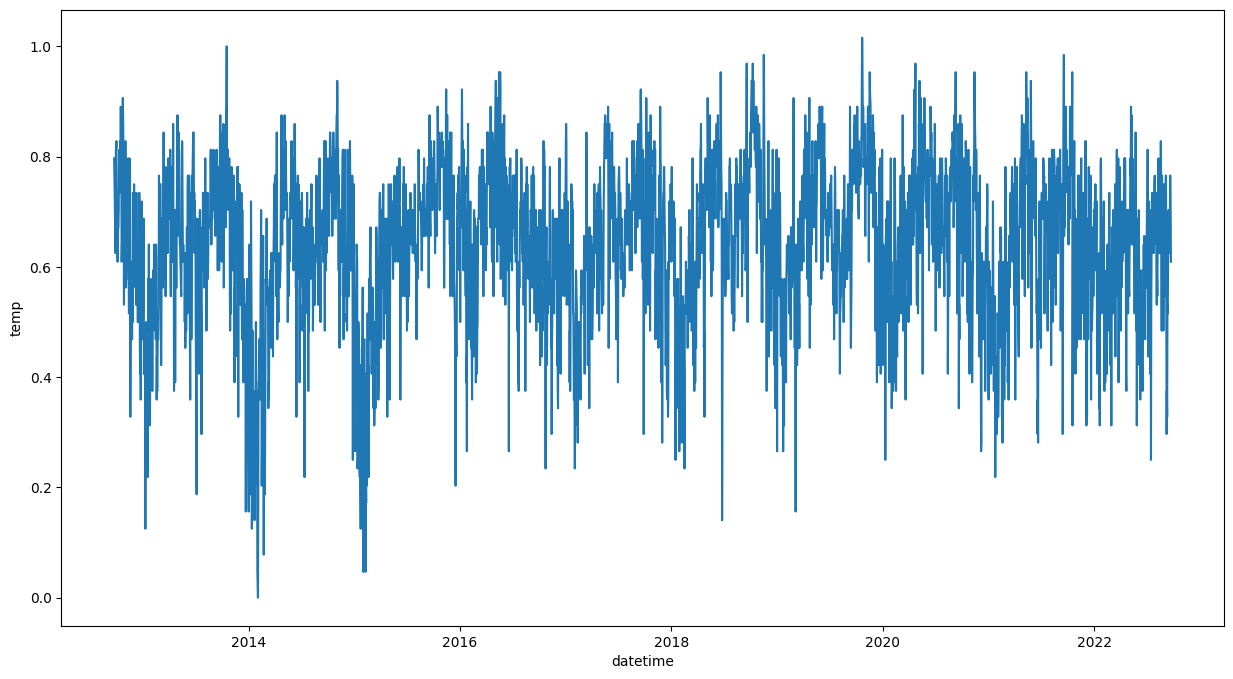

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

## Lag data

In [44]:
df

,temp
datetime,
2012-09-23,0.796875
2012-09-24,0.765625
2012-09-25,0.734375
2012-09-26,0.687500
2012-09-27,0.671875
...,...
2022-09-19,0.625000
2022-09-20,0.765625
2022-09-21,0.765625


In [45]:
df['tempy'] = df.temp.shift(periods=-1)
df.columns  = ['tempx','tempy']

In [46]:
df.drop(df.tail(1).index,inplace=True)
df

,tempx,tempy
datetime,,
2012-09-23,0.796875,0.765625
2012-09-24,0.765625,0.734375
2012-09-25,0.734375,0.687500
2012-09-26,0.687500,0.671875
2012-09-27,0.671875,0.625000
...,...,...
2022-09-18,0.656250,0.625000
2022-09-19,0.625000,0.765625
2022-09-20,0.765625,0.765625


In [57]:
X_train = df.iloc[:(int(0.4*df.shape[0])),0]
X_val = df.iloc[(int(0.4*df.shape[0])):(int(0.8*df.shape[0])),0]
X_test = df.iloc[(int(0.8*df.shape[0])):,0]

y_train = df.iloc[:(int(0.4*df.shape[0])),1]
y_val = df.iloc[(int(0.4*df.shape[0])):(int(0.8*df.shape[0])),1]
y_test = df.iloc[(int(0.8*df.shape[0])):,1]

# Modelling

Model LSTM dibuat dengan 1 layer yang memiliki 10 unit. Loss function yang digunakan adalah MSE dan metrik yang digunakan adalah RMSE dengan epoch sebanyak 100 kali.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense,Dropout,Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(InputLayer((1, 1)))
model.add(LSTM(10))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [60]:
model.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate = 0.0001), metrics=[RootMeanSquaredError()])

In [61]:
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=100, shuffle = False)

Epoch 1/100
46/46 [==============================] - 4s 20ms/step - loss: 0.4440 - root_mean_squared_error: 0.6664 - val_loss: 0.4668 - val_root_mean_squared_error: 0.6833
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4252 - root_mean_squared_error: 0.6520 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6689
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.4071 - root_mean_squared_error: 0.6380 - val_loss: 0.4287 - val_root_mean_squared_error: 0.6547
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3896 - root_mean_squared_error: 0.6242 - val_loss: 0.4106 - val_root_mean_squared_error: 0.6408
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.3728 - root_mean_squared_error: 0.6106 - val_loss: 0.3931 - val_root_mean_squared_error: 0.6270
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3565 - root_mean_squared_error: 0.5971 - val_loss: 0.3761 - val_root_

Epoch 49/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308
Epoch 50/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 51/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 52/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1228
Epoch 53/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0153 - root_mean_squared_error: 0.1239 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 54/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0151 - root_mean_squared_error: 0.1227 - val_loss: 0.0142 - val_

46/46 [==============================] - 0s 8ms/step - loss: 0.0136 - root_mean_squared_error: 0.1167 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 97/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 98/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 99/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 100/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0136 - root_mean_squared_error: 0.1164 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089


Berikut merupakan plot dari RMSE data latih dan RMSE data validasi.

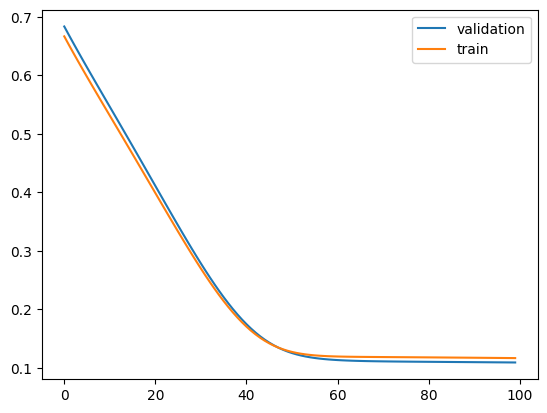

In [62]:
plt.plot(history.history['val_root_mean_squared_error'],label='validation')
plt.plot(history.history['root_mean_squared_error'],label='train')
plt.legend()
plt.show()

Model digunakan untuk memprediksi data uji.

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred

array([[0.57448816],
       [0.66335374],
       [0.6935379 ],
       [0.7299977 ],
       [0.66937304],
       [0.63341194],
       [0.66937304],
       [0.67540157],
       [0.7239068 ],
       [0.717821  ],
       [0.6513447 ],
       [0.60377085],
       [0.62151617],
       [0.63937813],
       [0.66335374],
       [0.6995988 ],
       [0.66937304],
       [0.63341194],
       [0.62745786],
       [0.6513447 ],
       [0.6935379 ],
       [0.68143886],
       [0.71174073],
       [0.6995988 ],
       [0.63341194],
       [0.63937813],
       [0.6573441 ],
       [0.5920116 ],
       [0.63341194],
       [0.5861545 ],
       [0.66937304],
       [0.70566654],
       [0.64535594],
       [0.5920116 ],
       [0.5628884 ],
       [0.5513588 ],
       [0.6513447 ],
       [0.6935379 ],
       [0.6513447 ],
       [0.5861545 ],
       [0.5628884 ],
       [0.58031327],
       [0.62151617],
       [0.62745786],
       [0.54562145],
       [0.58031327],
       [0.6155875 ],
       [0.621

Hasil prediksi kemudian diubah menjadi hasil prediksi suhu sebenarnya.

In [65]:
y_pred = mms.inverse_transform(y_pred)

In [66]:
y_pred

array([[26.676723],
       [27.245464],
       [27.43864 ],
       [27.671986],
       [27.283987],
       [27.053837],
       [27.283987],
       [27.32257 ],
       [27.633005],
       [27.594055],
       [27.168606],
       [26.864132],
       [26.977703],
       [27.09202 ],
       [27.245464],
       [27.477432],
       [27.283987],
       [27.053837],
       [27.015728],
       [27.168606],
       [27.43864 ],
       [27.36121 ],
       [27.55514 ],
       [27.477432],
       [27.053837],
       [27.09202 ],
       [27.207   ],
       [26.788874],
       [27.053837],
       [26.751389],
       [27.283987],
       [27.516266],
       [27.13028 ],
       [26.788874],
       [26.602484],
       [26.528696],
       [27.168606],
       [27.43864 ],
       [27.168606],
       [26.751389],
       [26.602484],
       [26.714005],
       [26.977703],
       [27.015728],
       [26.491978],
       [26.714005],
       [26.939758],
       [26.977703],
       [27.399899],
       [27.283987],


In [67]:
Y_inversed = mms.inverse_transform(y_test.r)

ValueError: Expected 2D array, got 1D array instead:
array=[0.703125 0.78125  0.875    0.71875  0.625    0.71875  0.734375 0.859375
 0.84375  0.671875 0.546875 0.59375  0.640625 0.703125 0.796875 0.71875
 0.625    0.609375 0.671875 0.78125  0.75     0.828125 0.796875 0.625
 0.640625 0.6875   0.515625 0.625    0.5      0.71875  0.8125   0.65625
 0.515625 0.4375   0.40625  0.671875 0.78125  0.671875 0.5      0.4375
 0.484375 0.59375  0.609375 0.390625 0.484375 0.578125 0.59375  0.765625
 0.71875  0.796875 0.8125   0.953125 0.890625 0.859375 0.828125 0.765625
 0.703125 0.8125   0.78125  0.640625 0.578125 0.515625 0.59375  0.625
 0.734375 0.703125 0.671875 0.546875 0.4375   0.703125 0.765625 0.46875
 0.59375  0.453125 0.265625 0.28125  0.546875 0.625    0.546875 0.546875
 0.546875 0.46875  0.53125  0.609375 0.59375  0.5      0.578125 0.578125
 0.375    0.421875 0.59375  0.671875 0.578125 0.671875 0.671875 0.75
 0.734375 0.578125 0.515625 0.390625 0.359375 0.609375 0.5625   0.59375
 0.46875  0.46875  0.46875  0.546875 0.40625  0.46875  0.5625   0.421875
 0.5      0.546875 0.578125 0.71875  0.578125 0.453125 0.375    0.46875
 0.421875 0.453125 0.546875 0.21875  0.4375   0.421875 0.375    0.34375
 0.296875 0.3125   0.390625 0.515625 0.5      0.328125 0.375    0.484375
 0.609375 0.484375 0.453125 0.53125  0.53125  0.671875 0.625    0.65625
 0.515625 0.515625 0.328125 0.4375   0.28125  0.375    0.53125  0.609375
 0.609375 0.5625   0.359375 0.484375 0.421875 0.59375  0.78125  0.71875
 0.5      0.59375  0.609375 0.53125  0.484375 0.5      0.390625 0.421875
 0.5625   0.359375 0.53125  0.65625  0.5625   0.5625   0.59375  0.71875
 0.734375 0.671875 0.671875 0.71875  0.734375 0.78125  0.671875 0.609375
 0.734375 0.65625  0.75     0.71875  0.53125  0.65625  0.546875 0.796875
 0.359375 0.625    0.65625  0.703125 0.546875 0.765625 0.78125  0.59375
 0.53125  0.625    0.546875 0.46875  0.4375   0.671875 0.671875 0.671875
 0.71875  0.734375 0.78125  0.796875 0.671875 0.765625 0.828125 0.875
 0.84375  0.578125 0.671875 0.734375 0.84375  0.859375 0.8125   0.796875
 0.734375 0.546875 0.765625 0.765625 0.75     0.828125 0.953125 0.890625
 0.875    0.859375 0.90625  0.875    0.828125 0.5625   0.8125   0.796875
 0.71875  0.6875   0.625    0.71875  0.71875  0.84375  0.9375   0.828125
 0.453125 0.6875   0.78125  0.703125 0.6875   0.8125   0.828125 0.8125
 0.734375 0.71875  0.765625 0.6875   0.765625 0.65625  0.75     0.796875
 0.6875   0.546875 0.515625 0.53125  0.453125 0.296875 0.359375 0.28125
 0.578125 0.515625 0.46875  0.671875 0.71875  0.59375  0.65625  0.578125
 0.53125  0.453125 0.703125 0.734375 0.734375 0.734375 0.734375 0.6875
 0.6875   0.796875 0.78125  0.75     0.765625 0.515625 0.59375  0.671875
 0.6875   0.75     0.75     0.703125 0.671875 0.71875  0.6875   0.546875
 0.484375 0.609375 0.65625  0.625    0.640625 0.71875  0.796875 0.75
 0.578125 0.6875   0.734375 0.75     0.421875 0.65625  0.78125  0.8125
 0.78125  0.5      0.734375 0.796875 0.625    0.78125  0.8125   0.796875
 0.78125  0.640625 0.5625   0.65625  0.53125  0.671875 0.765625 0.640625
 0.71875  0.78125  0.734375 0.796875 0.625    0.71875  0.71875  0.796875
 0.75     0.765625 0.765625 0.8125   0.75     0.484375 0.5625   0.65625
 0.71875  0.75     0.71875  0.734375 0.296875 0.59375  0.796875 0.890625
 0.984375 0.65625  0.71875  0.671875 0.796875 0.859375 0.859375 0.890625
 0.78125  0.8125   0.796875 0.78125  0.734375 0.734375 0.765625 0.75
 0.640625 0.78125  0.6875   0.765625 0.6875   0.890625 0.875    0.765625
 0.875    0.890625 0.8125   0.796875 0.8125   0.953125 0.3125   0.5
 0.734375 0.6875   0.765625 0.765625 0.828125 0.6875   0.703125 0.578125
 0.40625  0.6875   0.6875   0.609375 0.453125 0.46875  0.578125 0.578125
 0.515625 0.765625 0.46875  0.6875   0.765625 0.625    0.625    0.65625
 0.53125  0.75     0.46875  0.75     0.796875 0.71875  0.515625 0.5625
 0.71875  0.703125 0.53125  0.734375 0.703125 0.640625 0.46875  0.46875
 0.578125 0.65625  0.828125 0.828125 0.828125 0.40625  0.3125   0.453125
 0.328125 0.6875   0.5625   0.625    0.46875  0.65625  0.78125  0.6875
 0.65625  0.578125 0.59375  0.6875   0.765625 0.515625 0.359375 0.578125
 0.5      0.484375 0.515625 0.53125  0.671875 0.59375  0.546875 0.578125
 0.703125 0.703125 0.65625  0.71875  0.671875 0.75     0.59375  0.640625
 0.6875   0.71875  0.609375 0.4375   0.40625  0.484375 0.46875  0.46875
 0.5      0.625    0.34375  0.5      0.3125   0.515625 0.53125  0.78125
 0.796875 0.71875  0.515625 0.671875 0.546875 0.625    0.625    0.6875
 0.640625 0.5625   0.71875  0.46875  0.375    0.53125  0.5625   0.390625
 0.515625 0.46875  0.546875 0.59375  0.484375 0.40625  0.578125 0.640625
 0.53125  0.484375 0.515625 0.578125 0.65625  0.734375 0.625    0.59375
 0.453125 0.421875 0.484375 0.53125  0.3125   0.546875 0.671875 0.625
 0.515625 0.5625   0.703125 0.59375  0.546875 0.609375 0.625    0.515625
 0.609375 0.75     0.4375   0.6875   0.734375 0.640625 0.765625 0.8125
 0.75     0.71875  0.546875 0.734375 0.796875 0.390625 0.5625   0.640625
 0.75     0.78125  0.6875   0.671875 0.65625  0.484375 0.6875   0.5625
 0.6875   0.71875  0.609375 0.640625 0.625    0.671875 0.625    0.703125
 0.75     0.796875 0.765625 0.796875 0.796875 0.640625 0.671875 0.40625
 0.375    0.65625  0.703125 0.671875 0.6875   0.625    0.515625 0.703125
 0.59375  0.5625   0.546875 0.625    0.65625  0.71875  0.796875 0.765625
 0.890625 0.71875  0.875    0.640625 0.71875  0.796875 0.78125  0.703125
 0.640625 0.734375 0.6875   0.53125  0.515625 0.515625 0.546875 0.703125
 0.84375  0.546875 0.484375 0.6875   0.3125   0.453125 0.46875  0.53125
 0.625    0.5625   0.578125 0.703125 0.59375  0.421875 0.578125 0.53125
 0.359375 0.578125 0.59375  0.515625 0.5      0.53125  0.40625  0.421875
 0.375    0.421875 0.59375  0.59375  0.640625 0.59375  0.65625  0.53125
 0.5      0.46875  0.59375  0.625    0.59375  0.5625   0.640625 0.703125
 0.6875   0.8125   0.8125   0.4375   0.65625  0.71875  0.609375 0.59375
 0.640625 0.703125 0.40625  0.609375 0.59375  0.25     0.515625 0.625
 0.71875  0.734375 0.65625  0.640625 0.6875   0.671875 0.625    0.671875
 0.640625 0.75     0.765625 0.65625  0.6875   0.71875  0.734375 0.703125
 0.5625   0.53125  0.578125 0.546875 0.625    0.671875 0.734375 0.796875
 0.71875  0.625    0.65625  0.671875 0.625    0.640625 0.75     0.828125
 0.765625 0.65625  0.484375 0.765625 0.75     0.75     0.703125 0.59375
 0.484375 0.609375 0.703125 0.703125 0.75     0.640625 0.546875 0.625
 0.765625 0.765625 0.5      0.296875 0.375    0.328125 0.53125  0.515625
 0.59375  0.640625 0.703125 0.640625 0.703125 0.65625  0.625    0.765625
 0.765625 0.703125 0.609375].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Berikut adalah skor R2 dan MSE dari hasil peramalan.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_inversed, y_pred))
print(mean_squared_error(Y_inversed, y_pred))

In [ ]:
sns.regplot(Y_inversed, y_pred)

In [ ]:
df['temp'] = mms.inverse_transform(df)

In [ ]:
sns.lineplot(data = df, x = 'datetime',y = 'temp', label = 'actual')
plt.plot(df.index[(int(df.shape[0]*0.8))+window_global:], y_pred.flatten().tolist(), label = 'pred')
plt.legend()
plt.show()

In [ ]:
def df_to_X(df,window_size=window_global):
    df_as_np = df.to_numpy()
    X = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        #label = df_as_np[i+window_size]
        #y.append(label)
    return np.array(X)

In [ ]:
Xnew = mms.transform(df)

In [ ]:
Xnew = df_to_X(pd.Series(Xnew.flatten()))
Xnew

In [ ]:
Xnewnew = Xnew[-1].reshape((1,window_global,1))
Xnewnew

In [ ]:
hasil = model.predict(Xnewnew)
hasil.shape

In [ ]:
hasil

In [ ]:
def peramalan(x,modelan,window,forecasting=1):
    xx = x.flatten().tolist()
    for i in range(forecasting):
        print(window + i)
        x_feat = np.reshape(xx[i :window+i],(1,window,1))
        print(x_feat.flatten().tolist())
        xx.append(modelan.predict(x_feat).flatten().tolist()[0])
    xx = xx[window:]
    return(xx)

forecasting_result = peramalan(Xnewnew,model,window_global,365)

In [ ]:
forecasting_result

In [ ]:
result = mms.inverse_transform(np.reshape(forecasting_result, (-1, 1)))

In [ ]:
result

In [ ]:
plt.plot(result)

In [ ]:
sns.lineplot(data = df, x = 'datetime',y = 'temp', label = 'actual')
plt.plot(df.index[df.shape[0]:], result, label = 'pred')
plt.legend()
plt.show()